In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')


(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')


input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

C:\Users\May Phu Paing\anaconda3\envs\DL\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\May Phu Paing\anaconda3\envs\DL\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\May Phu Paing\anaconda3\envs\DL\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM,Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])


history = model.fit(input_train, y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 71s 432ms/step - loss: 0.6061 - acc: 0.6653 - val_loss: 0.4472 - val_acc: 0.8246
Epoch 2/10
157/157 [==============================] - 67s 428ms/step - loss: 0.3844 - acc: 0.8448 - val_loss: 0.3418 - val_acc: 0.8604
Epoch 3/10
157/157 [==============================] - 67s 428ms/step - loss: 0.2895 - acc: 0.8865 - val_loss: 0.3337 - val_acc: 0.8626
Epoch 4/10
157/157 [==============================] - 68s 435ms/step - loss: 0.2407 - acc: 0.9118 - val_loss: 0.2838 - val_acc: 0.8862
Epoch 5/10
157/157 [==============================] - 68s 435ms/step - loss: 0.2089 - acc: 0.9254 - val_loss: 0.2990 - val_acc: 0.8752
Epoch 6/10
157/157 [==============================] - 67s 424ms/step - loss: 0.1858 - acc: 0.9312 - val_loss: 0.3391 - val_acc: 0.8802
Epoch 7/10
157/157 [==============================] - 69s 437ms/step - loss: 0.1685 - acc: 0.9399 - val_loss: 0.3570 - val_acc: 0.8420
Epoch 8/10
157/157 [==============================] - 6

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


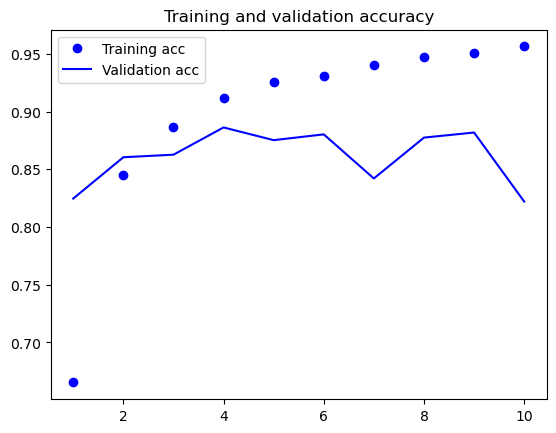

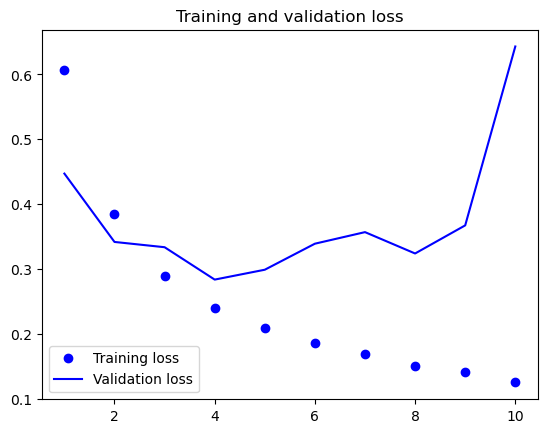

In [4]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()